# Data Cleaning and Transformation
## Initial Input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Manhattan12.csv", header = 4)
data.shape

(27395, 21)

The shape of the data is (27399, 21) as shown above. This means that there is initially 27399 rows and 21 columns of data.

## Column Renaming

In [2]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APART\nMENT\nNUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE\nPRICE', 'SALE DATE'],
      dtype='object')

Columns incorrectly named: 'APART\nMENT\nNUMBER', 'SALE\nPRICE'

In [3]:
data = data.rename(columns = {"APART\nMENT\nNUMBER":"APARTMENT NUMBER", "SALE\nPRICE":"SALE PRICE"})

In [4]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

Column names are now correct!

## Create List of Categoricals and Numerics

In [5]:
numericals = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS']
categoricals = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT',
                'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER', 'TAX CLASS AT TIME OF SALE', 
                'BUILDING CLASS AT TIME OF SALE', 'BLOCK', 'LOT', 'ADDRESS', 'ZIP CODE', 'YEAR BUILT', 'SALE DATE']

Two lists have been made which contains all the column names. Each column is either in the numerical or categorical list. They are split as followed:

In [6]:
print("Numericals:", str(numericals), "\nCategoricals:", str(categoricals))

Numericals: ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS'] 
Categoricals: ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'BLOCK', 'LOT', 'ADDRESS', 'ZIP CODE', 'YEAR BUILT', 'SALE DATE']


## Fixing Numerical Values

In [7]:
for i in numericals:
    if data[i].dtype not in ["int64"]:
        data[i] = data[i].apply(lambda a: a.replace("$", "").replace(",","")).astype("int64")

All values that should be numerical but aren't have now been converted to "int64"

## Converting Sale Date to datetime

In [8]:
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], dayfirst=True)

"SALE DATE" is now in datetime

## Fixing Categoricals

In [9]:
for i in categoricals:
    data[i] = data[i].replace(to_replace = r'[\s]+', value = "", regex = True)
    data[i] = data[i].replace(to_replace = "",  value = np.nan)

## Replacing Zeros

In [10]:
for i in numericals:
    data[i] = data[i].apply(lambda x: np.nan if x == 0 else x)

# Summary of Missing Values

In [11]:
data.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                         17
BUILDING CLASS CATEGORY            3454
TAX CLASS AT PRESENT                143
BLOCK                                 0
LOT                                   0
EASE-MENT                         27395
BUILDING CLASS AT PRESENT           143
ADDRESS                               0
APARTMENT NUMBER                  14570
ZIP CODE                              0
RESIDENTIAL UNITS                 16372
COMMERCIAL UNITS                  23962
TOTAL UNITS                        9704
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         7593
SALE DATE                             0
dtype: int64

The above list shows how many values are missing in each column

## Drop Columns

In [12]:
print("size before:", data.shape)
data.drop(columns = ["BOROUGH", "EASE-MENT", "APARTMENT NUMBER"], inplace = True)
print("size after:", data.shape)

size before: (27395, 21)
size after: (27395, 18)


## Drop Duplicates

In [13]:
print("size before:", data.shape)
data.drop_duplicates(inplace = True)
print("size after:", data.shape)

size before: (27395, 18)
size after: (25790, 18)


## Drop Rows with NaN

In [14]:
print("size before:", data.shape)
data.dropna(inplace = True)
print("size after:", data.shape)

size before: (25790, 18)
size after: (470, 18)


# Outliers

For this data, an outlier will be defined as 2 standard deviations from the mean. Theoretically 95% of all values should be within 2 STD from the mean in any distribution.

In [15]:
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,4.700000e+02
mean,1115.668085,43.470213,10025.927660,20.376596,2.168085,22.517021,4205.270213,21550.563830,1915.446809,2.165957,1.040005e+07
std,631.103400,61.664113,31.934953,46.634183,3.293633,47.435769,8037.013843,47270.568964,20.445891,0.748923,2.878480e+07
min,11.000000,1.000000,10001.000000,1.000000,1.000000,1.000000,469.000000,1650.000000,1877.000000,1.000000,1.000000e+00
25%,494.250000,18.000000,10012.000000,4.000000,1.000000,5.000000,1875.000000,5807.750000,1900.000000,2.000000,3.050000e+06
50%,1060.000000,32.000000,10020.000000,8.000000,2.000000,10.000000,2469.000000,8972.500000,1910.000000,2.000000,5.150625e+06
75%,1645.000000,50.000000,10030.000000,20.000000,2.000000,23.000000,4071.500000,18087.500000,1920.000000,2.000000,8.593184e+06
max,2230.000000,1001.000000,10463.000000,538.000000,63.000000,550.000000,150322.000000,509090.000000,2011.000000,4.000000,3.800000e+08


This table shows a description of number values (not numerical) in the data and shows some stastics. Initially we can say that BLOCK, LOT, ZIP CODE and TAX CLASS AT TIME OF SALE, cant contain outliers since they are categorical. For the rest we can check if the max and min values are within two standard deviations of the mean. 

<table>
  <tr>
    <th>Column</th>
    <th>Accepted Range</th>
    <th>Data Range</th>
    <th>Contains Outliers</th>
  </tr>  
  <tr>
    <th>COMMERIAL UNITS</th>
    <th>[-4.419181, 8.755351]</th>
    <th>[1, 63]</th>
    <th>yes</th>
  </tr>
  <tr>
    <th>LAND SQUARE FEET</th>
    <th>[-11868.757473, 20279.297899]</th>
    <th>[469, 150322]</th>
    <th>yes</th>
  </tr>
  <tr>
    <th>GROSS SQUARE FEET</th>
    <th>[-72990.574098, 116091.701758]</th>
    <th>[1650, 509090]</th>
    <th>yes</th>
  </tr>  
  <tr>
    <th>RESIDENTIAL UNITS</th>
    <th>[-72.89177, 113.644962]</th>
    <th>[1, 538]</th>
    <th>yes</th>
  </tr>
   <tr>
    <th>TOTAL UNITS</th>
    <th>[-72.354517, 117.388559]</th>
    <th>[1, 550]</th>
    <th>yes</th>
  </tr>
  <tr>
    <th>SALE PRICE</th>
    <th>[-4.7169550e7, 6.7969650e7]</th>
    <th>[1, 3.8e8]</th>
    <th>yes</th>
  </tr>
</table>

This means all of the columns in the table above should have a check to remove outliers

In [16]:
def identify_outlier(df):
    temp = np.zeros(df.shape[0])
    desc = data.describe()
    for i in ["COMMERCIAL UNITS","LAND SQUARE FEET","GROSS SQUARE FEET","RESIDENTIAL UNITS","SALE PRICE", "TOTAL UNITS"]:
        for j, x in enumerate(df[i]):
            if x < desc[i]["mean"] - 2*desc[i]["std"] or x > desc[i]["mean"] + 2*desc[i]["std"]:
                temp[j] = 1  
    df['outlier'] = temp
    return df

data = identify_outlier(data)
print("number of outliers identified:", data['outlier'].sum())
data = data[data.outlier == 0]
data.drop('outlier', axis = 1, inplace = True)


number of outliers identified: 18.0


# Summary

In [17]:
data.shape

(452, 18)

The shape of the resulting data is (442, 18). This means there are 18 different columns and 442 different entries and is the end sample size

# Normalisation and lnprice

In [18]:
data["lnprice"] = np.log(data["SALE PRICE"])
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,4.520000e+02,452.000000
mean,1111.110619,41.732301,10025.183628,14.170354,1.918142,16.059735,3402.106195,14911.619469,1914.070796,2.154867,7.000814e+06,15.053273
std,636.281047,43.314828,31.284892,15.814185,1.404752,16.509313,2891.025944,16719.754223,17.853539,0.743276,7.173531e+06,2.256300
min,11.000000,1.000000,10001.000000,1.000000,1.000000,1.000000,469.000000,1650.000000,1877.000000,1.000000,1.000000e+00,0.000000
25%,493.500000,17.000000,10011.750000,3.750000,1.000000,5.000000,1861.750000,5693.500000,1900.000000,2.000000,3.037500e+06,14.926520
50%,1059.000000,32.000000,10019.000000,8.000000,1.500000,10.000000,2458.000000,8725.000000,1910.000000,2.000000,5.063292e+06,15.437518
75%,1661.250000,50.000000,10030.000000,19.250000,2.000000,21.000000,3758.750000,15791.500000,1920.000000,2.000000,8.307351e+06,15.932650
max,2230.000000,505.000000,10463.000000,105.000000,8.000000,112.000000,15987.000000,111457.000000,2011.000000,4.000000,5.000000e+07,17.727534


In [19]:
def normalise(df):
    columns = ["COMMERCIAL UNITS","LAND SQUARE FEET","GROSS SQUARE FEET","RESIDENTIAL UNITS","SALE PRICE", "TOTAL UNITS", "lnprice"]
    desc = df.describe()
    for i in columns:
        temp = np.zeros(df.shape[0])
        for j, x in enumerate(data[i]):
            temp[j] = (x-desc[i]["min"])/(desc[i]["max"]-desc[i]["min"])
        data[i] = temp
    return df

In [20]:
data = normalise(data)
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1111.110619,41.732301,10025.183628,0.126638,0.131163,0.135673,0.189013,0.120772,1914.070796,2.154867,0.140016,0.849146
std,636.281047,43.314828,31.284892,0.152059,0.200679,0.148733,0.186301,0.152265,17.853539,0.743276,0.143471,0.127277
min,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1877.000000,1.000000,0.000000,0.000000
25%,493.500000,17.000000,10011.750000,0.026442,0.000000,0.036036,0.089751,0.036824,1900.000000,2.000000,0.060750,0.841996
50%,1059.000000,32.000000,10019.000000,0.067308,0.071429,0.081081,0.128174,0.064431,1910.000000,2.000000,0.101266,0.870822
75%,1661.250000,50.000000,10030.000000,0.175481,0.142857,0.180180,0.211996,0.128785,1920.000000,2.000000,0.166147,0.898752
max,2230.000000,505.000000,10463.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2011.000000,4.000000,1.000000,1.000000




# Data Exploration



### Visualise the prices across specific neighborhoods
Scatter plots do not work with categorical variables, in this case for specific neighbourhoods. Therefore, to get a real depiction of categorical variable of a neighbourhood affecting price (numerical variable) we can use boxplots. 

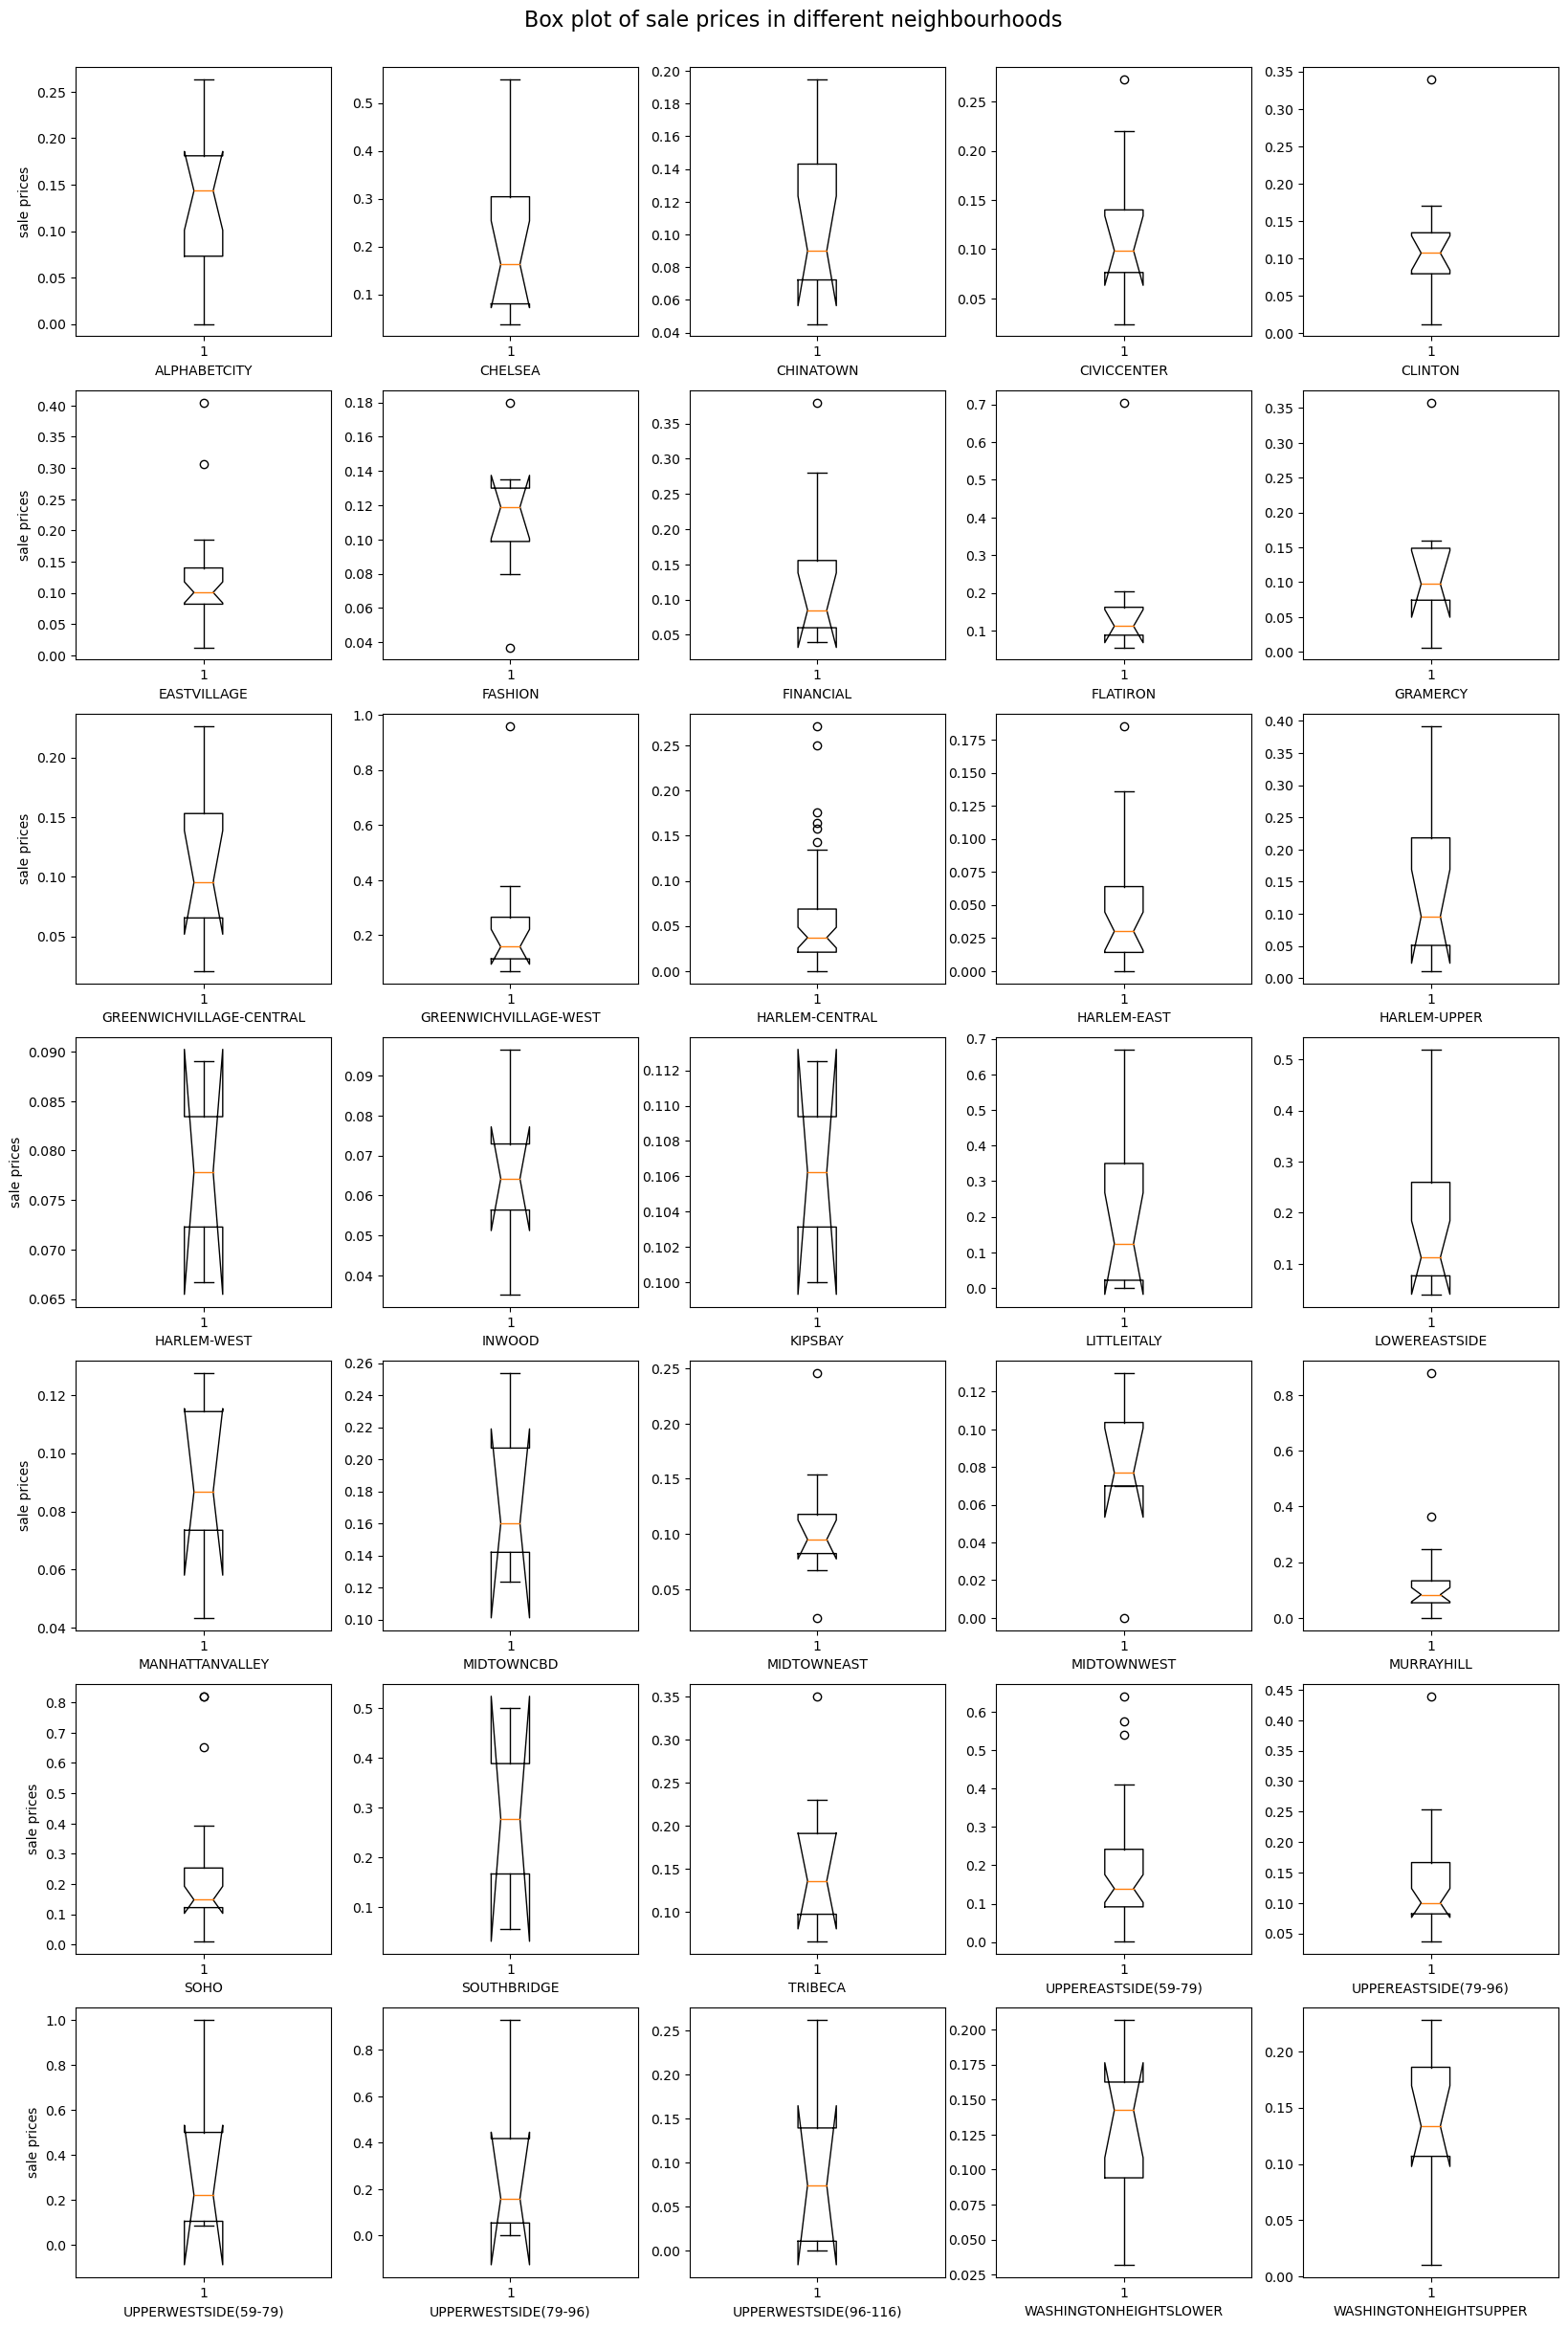

In [21]:
'''
First explore typical prices across different specific neighbourhoods.
'''

def price_neigh(df):
    unique_neigh = df["NEIGHBORHOOD"].unique() 
    fig, axs = plt.subplots(7, 5,figsize=(20, 30), gridspec_kw={'width_ratios': [4, 4, 4, 4, 4],'height_ratios': [6, 6, 6, 6, 6, 6, 6]})
    fig.suptitle('Box plot of sale prices in different neighbourhoods', fontsize=16, y=0.9)
    subr=0
    subc=0
    for un in range(0,len(unique_neigh)):
        dfN = df.loc[df["NEIGHBORHOOD"]==unique_neigh[un]]
        #df.loc[df["NEIGHBORHOOD"]==unique_neigh[un]].boxplot("lnprice","NEIGHBORHOOD", ax)
        axs[subr,subc].boxplot(dfN["SALE PRICE"], "NEIGHBORHOOD")
        #axs[subr,subc].set_title("Box plot of sale prices in {}".format(unique_neigh[un]))
        if subc == 0:
            axs[subr,subc].set_ylabel("sale prices")
        axs[subr,subc].set_xlabel(unique_neigh[un])
        axs[subr,subc].set_aspect('auto')
        if subc==4:
            subc=0
            subr+=1
        else:
            subc+=1
    plt.show()
    
    #########-----WHOLE VIEW----###########
    #fig = plt.figure(figsize=(40,12))
    #ax = fig.gca()
    #df.boxplot("lnprice","NEIGHBORHOOD", ax)
    #ax.set_title("Box plot of sale prices in each neighborhood")
    #ax.set_ylabel("sale prices")
    #plt.xticks(rotation=30, ha="right", rotation_mode='anchor')
    #plt.show()
    
price_neigh(data)

Varying price quartiles and medians within different neighbourhoods suggest that the neighbourhood has an impact on overall sale price and should be considered by the model. 



### Visualise the prices over time

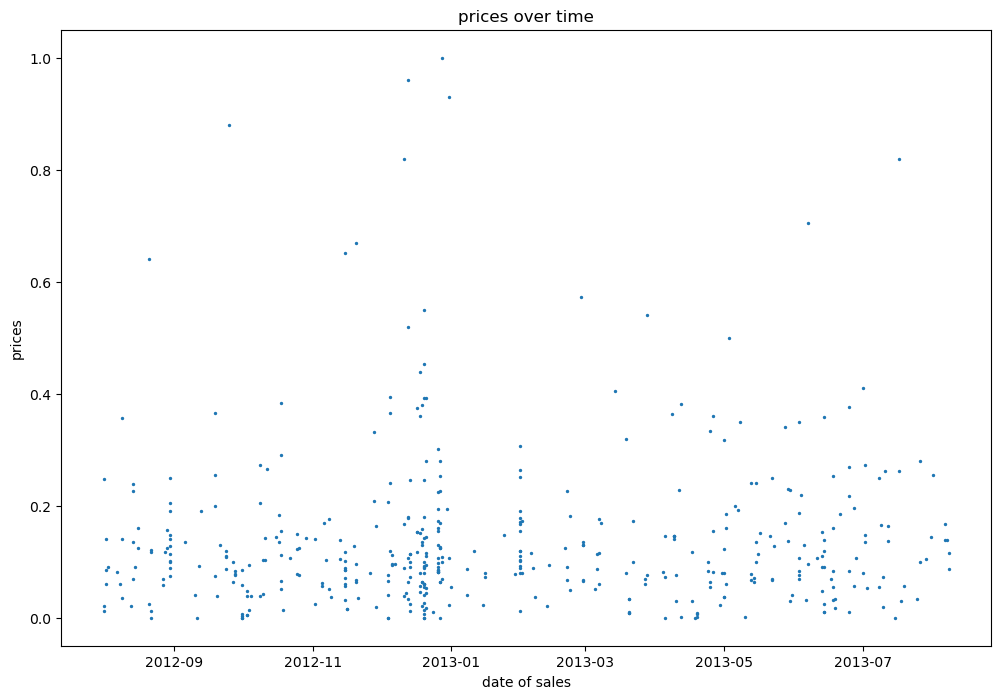

In [22]:
def price_time(df):
    fig, axs = plt.subplots(1,1, figsize=(12,8))
    """
    axs[0].scatter(df["SALE DATE"], df["lnprice"], s=2)
    axs[0].set_title("lnprices over time")
    axs[0].set_ylabel("lnprices")
    axs[0].set_xlabel("date of sales")
    axs[0].set_aspect("auto")
    """
    
    axs.scatter(df["SALE DATE"], df["SALE PRICE"], s=2)
    axs.set_title("prices over time")
    axs.set_ylabel("prices")
    axs.set_xlabel("date of sales")
    axs.set_aspect("auto")
    plt.show()
    
    
price_time(data)


Can see that prices generally lie between 0.8 and 1 over the years. The number of low sales have decreased which suggest an overall increase in sale prices. 

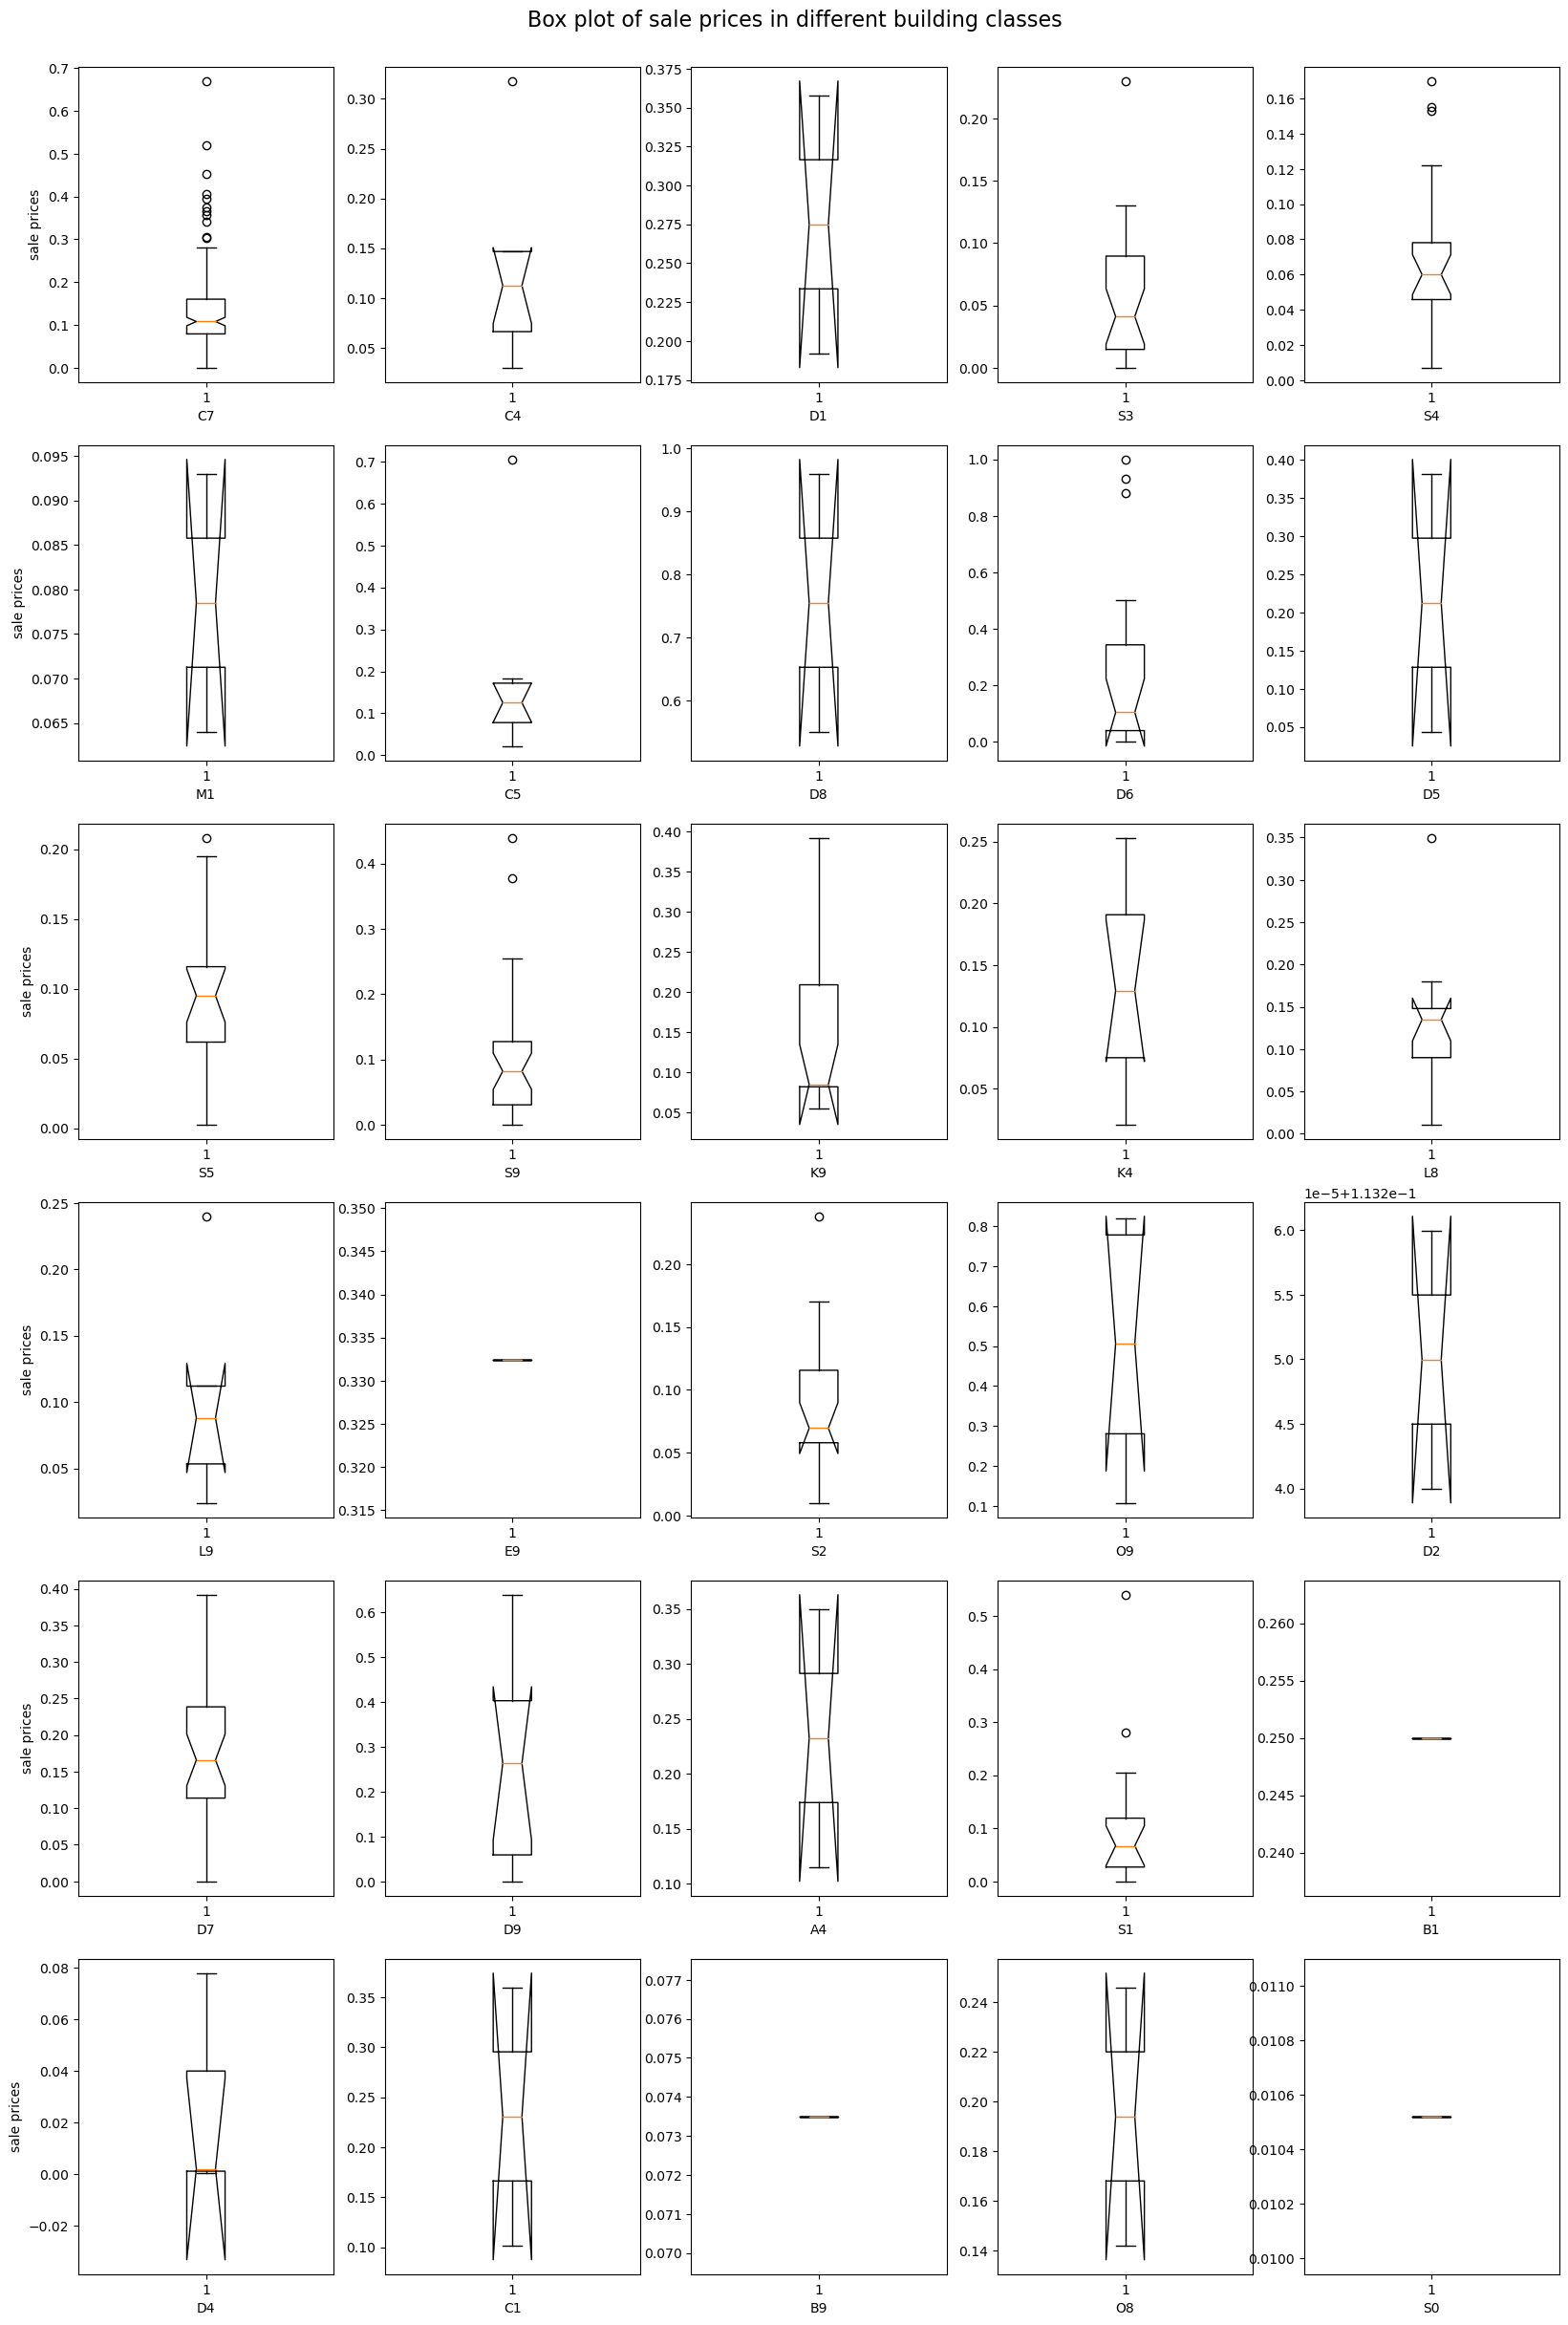

In [23]:
def p_bc(df):
    #data.boxplot("lnprice", "BUILDING CLASS AT TIME OF SALE")
    #plt.show()
    unique_bc = df["BUILDING CLASS AT TIME OF SALE"].unique() 
    fig, axs = plt.subplots(6, 5,figsize=(20, 30), gridspec_kw={'width_ratios': [4, 4, 4, 4, 4],'height_ratios': [6, 6, 6, 6, 6, 6]})
    fig.suptitle('Box plot of sale prices in different building classes', fontsize=16, y=0.9)
    subr=0
    subc=0
    for un in range(0,len(unique_bc)):
        dfN = df.loc[df["BUILDING CLASS AT TIME OF SALE"]==unique_bc[un]]
        axs[subr,subc].boxplot(dfN["SALE PRICE"], "BUILDING CLASS AT TIME OF SALE")
        if subc == 0:
            axs[subr,subc].set_ylabel("sale prices")
        axs[subr,subc].set_xlabel(unique_bc[un])
        axs[subr,subc].set_aspect('auto')
        if subc==4:
            subc=0
            subr+=1
        else:
            subc+=1
    plt.show()
p_bc(data)

Variability within different values of the building class suggest that the class of the property greatly determines the sale price.

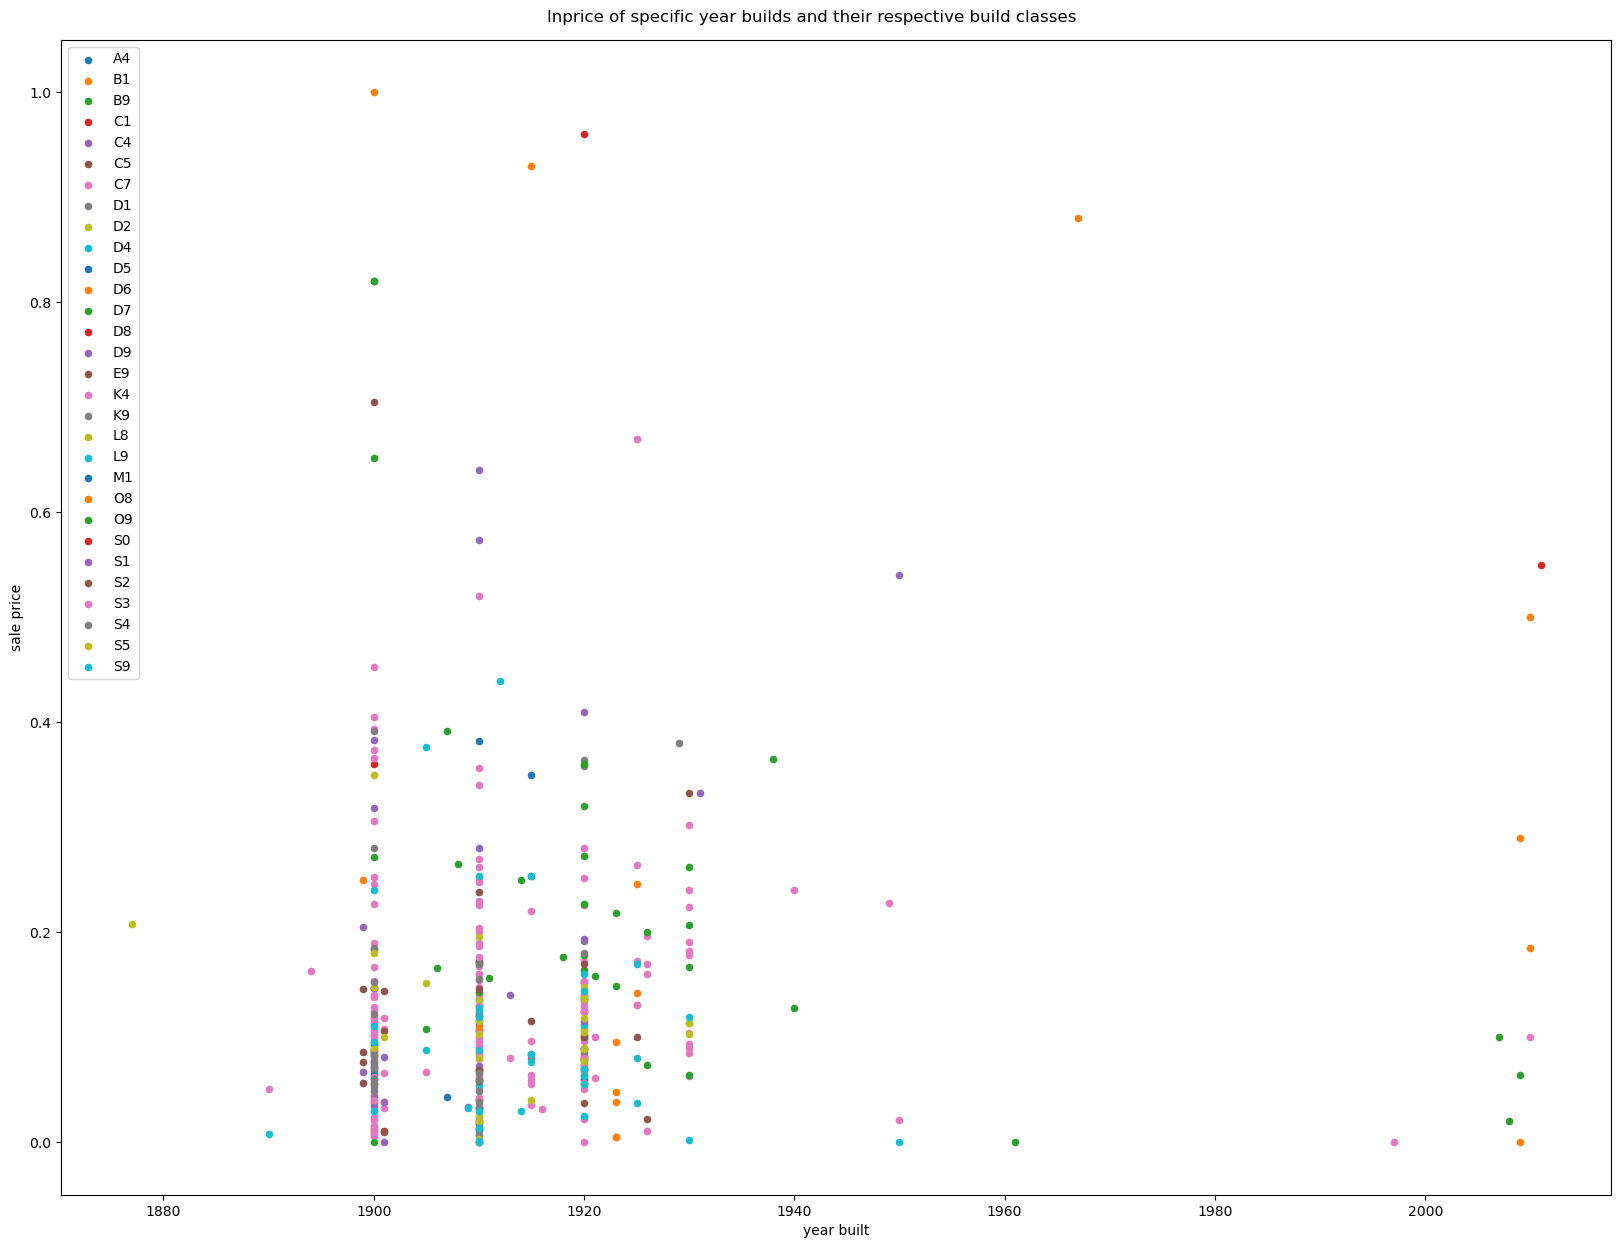

In [24]:
'''
Prices against year of build with colour coding of different building classes
'''
def prices_build(df):
    plt.figure(figsize=(20,15))
    groups = df.groupby('BUILDING CLASS AT TIME OF SALE')
    for name, gdf in groups:
        plt.scatter(gdf["YEAR BUILT"], gdf["SALE PRICE"], s=[5*4], label=name)
    plt.ylabel("sale price")
    plt.xlabel("year built")
    plt.suptitle("lnprice of specific year builds and their respective build classes", y=0.9)
    plt.legend()
    plt.show()
prices_build(data)

From this scatter plot we can conclude that the year build of the property factors greatly into the price. However, the number of data points for later years (>1960) is reduced. This may build some bias in the model predictions to favour the smaller set of data points for later years. Variability within the different classes for price output suggest that the class parameter should be considered in the final model.

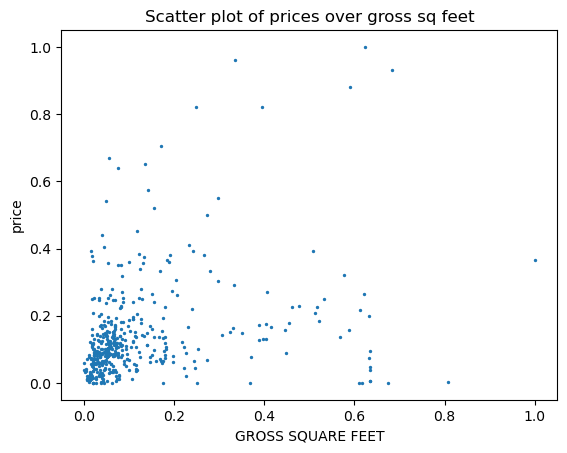

In [25]:
def price_grossSq(df):
    plt.title("Scatter plot of prices over gross sq feet")
    plt.scatter(df["GROSS SQUARE FEET"], df["SALE PRICE"], s=2)
    plt.ylabel("price")
    plt.xlabel("GROSS SQUARE FEET")
    plt.show()
    
    
price_grossSq(data)

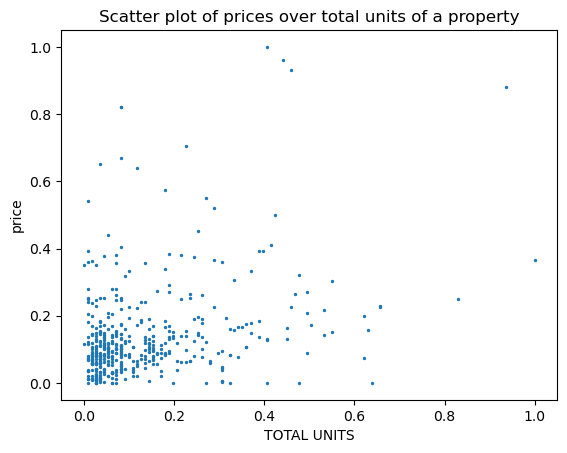

In [26]:
def price_tu(df):
    plt.title("Scatter plot of prices over total units of a property")
    plt.scatter(df["TOTAL UNITS"], df["SALE PRICE"], s=2)
    plt.ylabel("price")
    plt.xlabel("TOTAL UNITS")
    plt.show()
    
    
price_tu(data)

## Scatter plot matrix of numeric variables

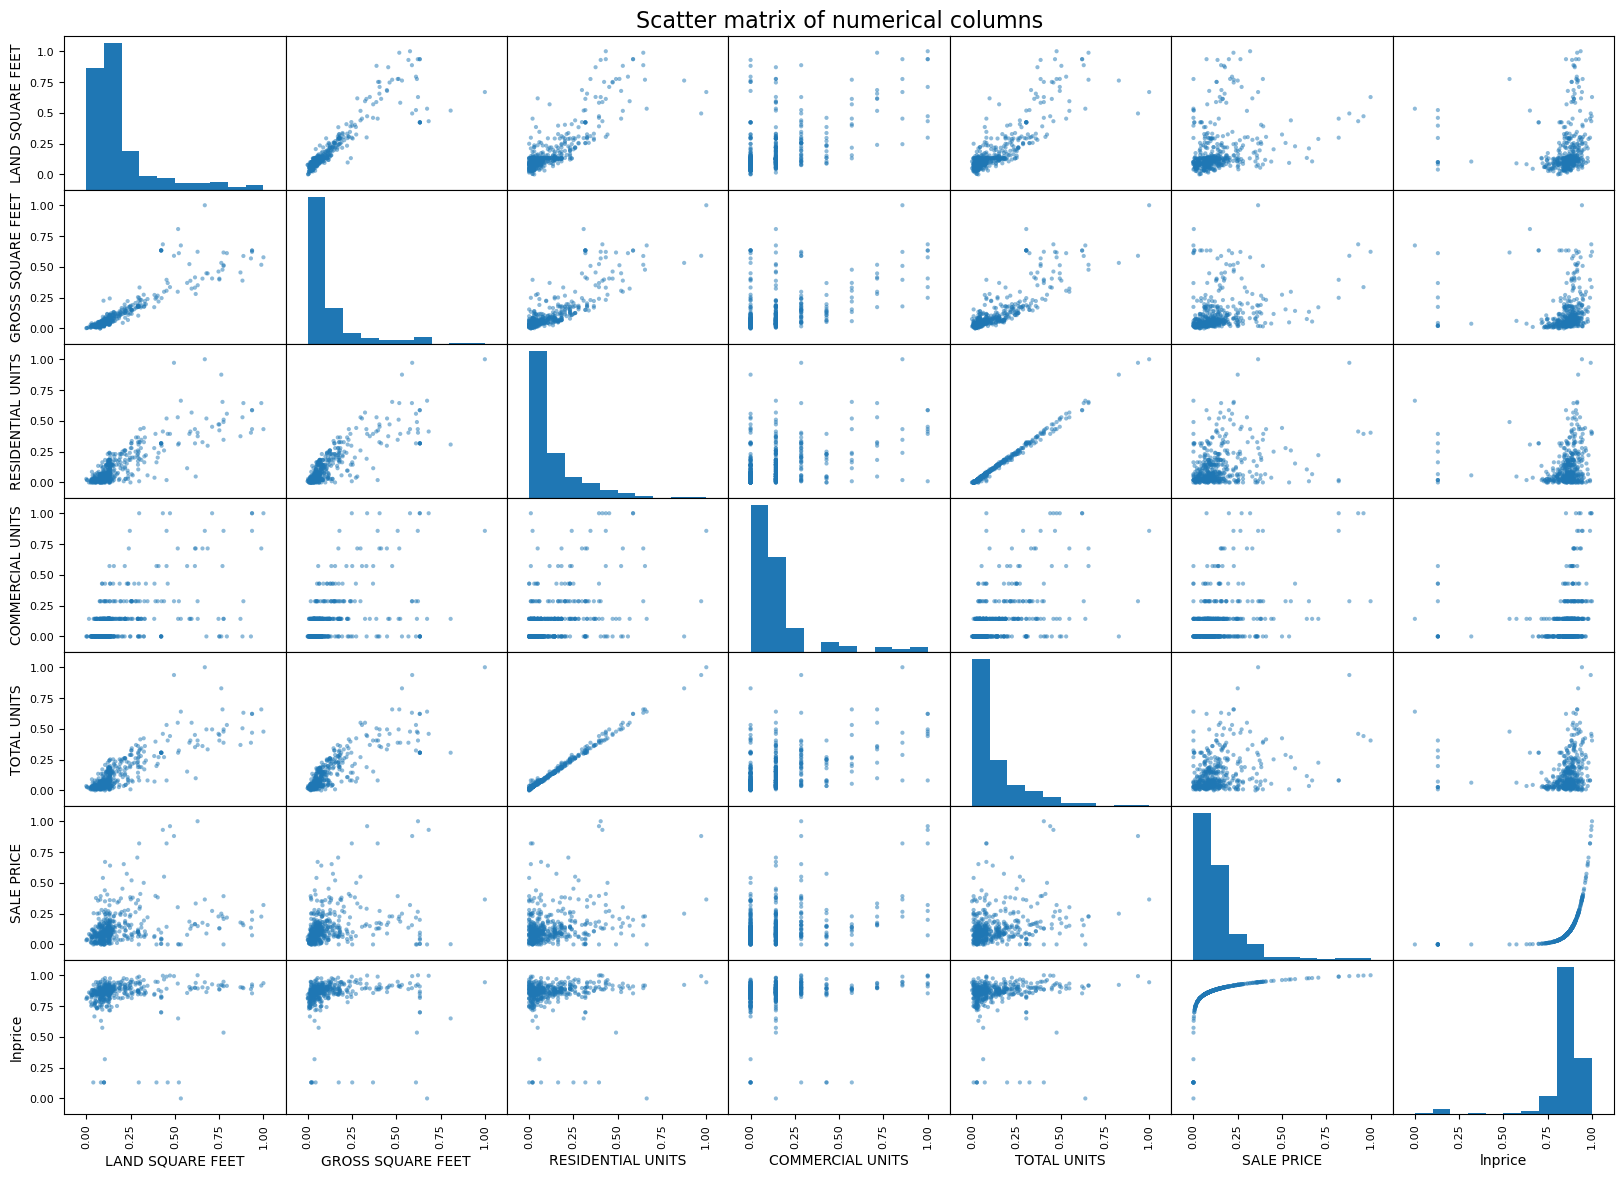

In [27]:
from pandas.plotting import scatter_matrix

def scatter_m(df, numericals):
    scatter_matrix(df[numericals], diagonal='hist', figsize=(20,14), range_padding=0.25)
    plt.title('Scatter matrix of numerical columns', fontsize=16, y=7, x=-2.5)
    plt.show()
    
numericals = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'SALE PRICE','lnprice']
scatter_m(data,numericals)

Collinearities:
- Near perfect positive correlation:
        Residential units vs Total units
- Very strong positive correlation:
        Land Square feet vs Gross square feet \n
        Land Square feet vs Residential units
        Land Square feet vs Total units
        Gross square feet vs Residential units
        Gross square feet vs Total units
- Weak positive correlation:
        Commercial units vs Land Square feet
        Sale price vs land square feet
        Sale price vs gross square feet
        Sale price vs Residential units
        Sale price vs Commercial units
        Sale price vs Total units
        
## Add negatives after sorting lnprice - NEED TO SORT OUT LNPRICE


## Correlation matrix 

In [28]:
corr = data[numericals].corr().style.background_gradient(cmap="spring")
corr
#styled = corr.style.background_gradient(cmap="spring").setPrecision(3)

,LAND SQUARE FEET,GROSS SQUARE FEET,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE PRICE,lnprice
LAND SQUARE FEET,1.000000,0.897274,0.827359,0.558941,0.840645,0.286773,0.053404
GROSS SQUARE FEET,0.897274,1.000000,0.831871,0.509969,0.840815,0.308294,-0.012273
RESIDENTIAL UNITS,0.827359,0.831871,1.000000,0.456464,0.997017,0.295731,0.053221
COMMERCIAL UNITS,0.558941,0.509969,0.456464,1.000000,0.522901,0.399029,0.113792
TOTAL UNITS,0.840645,0.840815,0.997017,0.522901,1.000000,0.316659,0.060007
SALE PRICE,0.286773,0.308294,0.295731,0.399029,0.316659,1.000000,0.475162
lnprice,0.053404,-0.012273,0.053221,0.113792,0.060007,0.475162,1.000000


# Choosing good predictors

There are 2 ways of choosing predictors for the regression model. You can either use an estimator algorithm that fits the list of numerical columns to find which columns/features best predict the outcome. The number of features we want to select depends on us and in this scenario we want at least 3 so the model generalises well. The second method is to hand pick the predictors based on the correlation matrix and choosing the features with the highest correlation to sale price.

In [78]:
from sklearn import svm, feature_selection, linear_model

def first_ranked_predictors:
    predictor_features = ['COMMERCIAL UNITS', 'TOTAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
    feature_cols = df[predictor_features].columns.values.tolist()
    print(feature_cols)

    XO = df[feature_cols]
    YO = df['SALE PRICE']
    estimator = svm.SVR(kernel="linear")
    selector = feature_selection.RFE(estimator, n_features_to_select=3, step=3)
    selector = selector.fit(XO, YO)
    # From the ranking you can select your predictors with rank 1
    # Model 1; let us select the folowing features as predictors:
    select_features = np.array(feature_cols)[selector.ranking_ == 1].tolist()
    return select_features

select_features = first_ranked_predictors()

['COMMERCIAL UNITS', 'TOTAL UNITS', 'GROSS SQUARE FEET']
['COMMERCIAL UNITS', 'TOTAL UNITS', 'GROSS SQUARE FEET']


# Data splitting and Model training
sklearn's functions can be used to split the dataset into a large train set and a small test set to compare the predictions with. Since, we want to predict the house sale price we need to use a linear regression model. After, the model is trained we can find the training and test accuracy.

In [98]:
from sklearn.model_selection import train_test_split

predictor_features = ['COMMERCIAL UNITS', 'TOTAL UNITS', 'GROSS SQUARE FEET']
X = df[predictor_features]
Y = df['SALE PRICE']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
lm = linear_model.LinearRegression()
lm.fit(trainX, trainY)
# Inspect the calculated model equations
print("Y-axis intercept {:6.4f}".format(lm.intercept_))
print("Weight coefficients:")
for feat, coef in zip(select_features, lm.coef_):
    print(" {:>20}: {:6.4f}".format(feat, coef))
# The value of R^2
print("R squared for the training data is {:4.3f}".format(lm.score(trainX, trainY)))
print("Score against test data: {:4.3f}".format(lm.score(testX, testY)))


Y-axis intercept 0.0904
Weight coefficients:
     COMMERCIAL UNITS: 0.2302
          TOTAL UNITS: 0.0884
    GROSS SQUARE FEET: 0.0861
R squared for the training data is 0.163
Score against test data: 0.293


# Histogram of residuals
Residuals are the difference in the actual value and predicted value to find out how far off the model was.

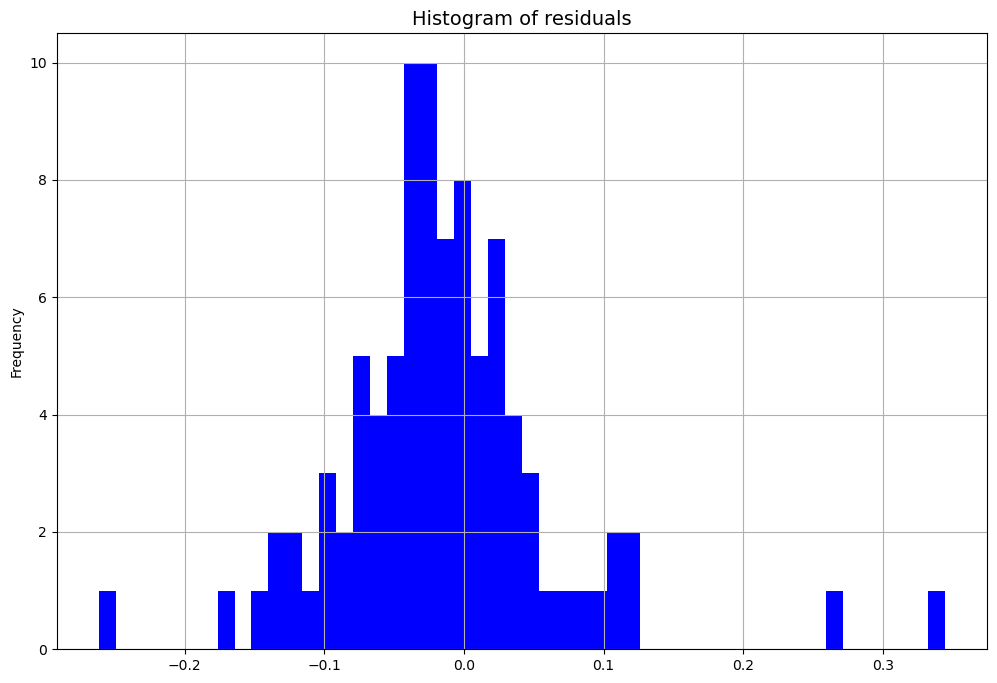

In [99]:
prediction = lm.predict(testX)
residuals = (testY - prediction)

plt.figure(figsize=(12, 8))
plt.title('Histogram of residuals', fontsize=14)
plt.hist(residuals, color='blue', bins=50)
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Cross validation

In [100]:
from sklearn.model_selection import cross_val_score

#scores = cross_val_score(lm, X, Y, scoring="explained_variance" cv=5)
#print(scores)


scores = cross_val_score(lm, X, Y, cv=5) # 5 K-folds is the default value
print("Cross validation scores: {}".format(scores))
print("Cross validation mean scores: {}".format(scores.mean()))

Cross validation scores: [ 0.1008296   0.16119622 -0.06081177  0.13639454  0.14689294]
Cross validation mean scores: 0.0969003051548369
